In [ ]:
import tensorflow as tf

In [ ]:
!unzip "/content/drive/MyDrive/Thesis Data/Brain Patients.zip" -d "/content/drive/MyDrive/Thesis Data/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Thesis Data/Brain Patients -HG LG - Copy - Copy/HighGrade/123abcz (4431).jpg  
  inflating: /content/drive/MyDrive/Thesis Data/Brain Patients -HG LG - Copy - Copy/HighGrade/123abcz (4432).jpg  
  inflating: /content/drive/MyDrive/Thesis Data/Brain Patients -HG LG - Copy - Copy/HighGrade/123abcz (4433).jpg  
  inflating: /content/drive/MyDrive/Thesis Data/Brain Patients -HG LG - Copy - Copy/HighGrade/123abcz (4434).jpg  
  inflating: /content/drive/MyDrive/Thesis Data/Brain Patients -HG LG - Copy - Copy/HighGrade/123abcz (4435).jpg  
  inflating: /content/drive/MyDrive/Thesis Data/Brain Patients -HG LG - Copy - Copy/HighGrade/123abcz (4436).jpg  
  inflating: /content/drive/MyDrive/Thesis Data/Brain Patients -HG LG - Copy - Copy/HighGrade/123abcz (4437).jpg  
  inflating: /content/drive/MyDrive/Thesis Data/Brain Patients -HG LG - Copy - Copy/HighGrade/123abcz (4438).jpg  
  inflating: /content/drive/M

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/Thesis Data/Brain Patients -HG LG - Copy - Copy", output="/content/drive/MyDrive/Thesis Data/", seed=1337, ratio=(.7, 0.2,0.1)) 

Copying files: 7033 files [01:04, 108.44 files/s]


In [ ]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.layers import *
from keras import models
model = models.Sequential()
from keras.preprocessing import image

In [ ]:
from tensorflow.keras.applications import InceptionV3
conv_base = InceptionV3(weights='imagenet',
                              include_top=False,
                              input_shape=(256, 256, 3))

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory("/content/drive/MyDrive/Thesis Data/train",
                                            image_size=(256,256), batch_size=32)

Found 4922 files belonging to 2 classes.


In [ ]:
val_dataset = image_dataset_from_directory("/content/drive/MyDrive/Thesis Data/val",
                                             image_size=(256, 256),batch_size=32)

Found 1406 files belonging to 2 classes.


In [13]:
test_dataset = image_dataset_from_directory("/content/drive/MyDrive/Thesis Data/test",
                                             image_size=(256,256))

Found 705 files belonging to 2 classes.


In [ ]:

history = model.fit(
train_dataset,validation_data = val_dataset, epochs=30)

Epoch 1/30
154/154 [==============================] - 332s 2s/step - loss: 1.2580 - accuracy: 0.5256 - val_loss: 4059.3403 - val_accuracy: 0.4580
Epoch 2/30
154/154 [==============================] - 55s 353ms/step - loss: 0.7224 - accuracy: 0.5416 - val_loss: 498.1899 - val_accuracy: 0.4701
Epoch 3/30
154/154 [==============================] - 56s 356ms/step - loss: 0.6995 - accuracy: 0.5701 - val_loss: 138.8440 - val_accuracy: 0.5505
Epoch 4/30
154/154 [==============================] - 56s 359ms/step - loss: 0.6698 - accuracy: 0.6475 - val_loss: 2.0892 - val_accuracy: 0.6394
Epoch 5/30
154/154 [==============================] - 58s 372ms/step - loss: 0.6094 - accuracy: 0.6851 - val_loss: 2.7169 - val_accuracy: 0.4950
Epoch 6/30
154/154 [==============================] - 57s 364ms/step - loss: 0.5931 - accuracy: 0.7074 - val_loss: 419.1140 - val_accuracy: 0.4602
Epoch 7/30
154/154 [==============================] - 57s 363ms/step - loss: 0.5471 - accuracy: 0.7347 - val_loss: 7.8611 -

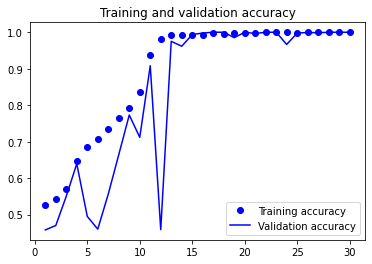

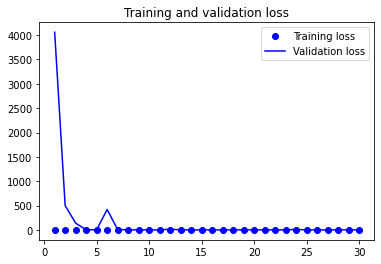

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [14]:
model.evaluate(test_dataset)

23/23 [==============================] - 3s 107ms/step - loss: 1.1859e-16 - accuracy: 1.0000


[1.1859040949733482e-16, 1.0]